# (0) Load_Data_PreProcessing

In [38]:
# import req library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [39]:
# Load the dataset

file_path = '/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') # Changed %y to %Y

EDA = Exploratory data analysis

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4967 non-null   datetime64[ns]
 1   Open    4967 non-null   object        
 2   High    4967 non-null   object        
 3   Low     4967 non-null   object        
 4   Close   4967 non-null   object        
 5   Volume  4967 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 233.0+ KB


In [41]:
# import ydata python library instead of pandas-profiling

# !pip install ydata-profiling

# from ydata_profiling import ProfileReport

# # create profile
# profile = ProfileReport(data)

# # save report
# profile.to_file(output_file='output_TCS.html')

(i) assign_Dep_Indep_Variable

In [42]:
# Independent variables (X-axis): 'Open', 'Low', 'High', 'Adj Close', 'Volume'
# Dependent variable (Y-axis): 'Close'


X = data[['Open', 'Low', 'High', 'Volume']].values
Y = data['Close'].values

(ii) Normalize_MinMax_Scale

In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Replace commas in numerical columns with empty strings and convert to numeric

for col in ['Open', 'Low', 'High', 'Volume', 'Close']: # Include 'Close' in the loop

    if data[col].dtype == object:
        data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')
    else:
      pass

# Now, redefine X and Y using the updated 'data'
X = data[['Open', 'Low', 'High', 'Volume']].values
Y = data['Close'].values


scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

In [44]:
# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

In [45]:
# Create a function to create sequences

def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)


time_steps = 60  # Use the past 60 days to predict the next day
X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)

(iii) split_TrainTest

In [46]:
# Split the data into training and test sets

train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing


X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# (1) Build_ANN_Model

In this section, we create the ANN (Artifical Neural Network) which is mostly based perceptron MLP (Multilayer Perceptron) as we know.

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# import metric imp library for MAE, MSE, RMSE, R Sq

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:

# Define and train the ANN MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

mlp.fit(X_train, Y_train)

Predication

In [ ]:
# Inverse transform the predictions and actual values

train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Print the forecasted values
for date, value in zip(future_dates, forecast):
    print(f"{date.date()}: {value[0]:.2f}")

In [ ]:
# Print the evaluation metrics

print("Training Metrics:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")

# (2) RNN

In [49]:
# Load
data = pd.read_csv('/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv')

# Replace commas in numerical columns with empty strings and convert to numeric
for col in ['Open', 'Low', 'High', 'Volume', 'Close']:  # Include 'Close' in the loop
    if data[col].dtype == object:
        data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

# Define X and Y
X = data[['Open', 'Low', 'High', 'Volume']].values  # Features
Y = data['Close'].values  # Target



# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

# SPLITTING
train_size = int(len(X_scaled) * 0.8)

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_test = Y_scaled[:train_size], Y_scaled[train_size:]



# Function to create sequences for time series prediction
def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])  # Create sequences of features
        Ys.append(Y[i + time_steps])      # Corresponding target (next step)
    return np.array(Xs), np.array(Ys)




# Set time_steps
time_steps = 60

# Create sequences for training and testing data
X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)



In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout  #for Simple RNN creating


In [51]:

# Define the Simple RNN model
model = Sequential()

# First RNN layer
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dropout(0.2))

# Second RNN layer
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer (regression task)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model

history = model.fit(X_seq, Y_seq, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1062 - val_loss: 0.0105
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0121 - val_loss: 0.0023
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0057 - val_loss: 0.0030
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0041 - val_loss: 6.9642e-04
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0027 - val_loss: 3.4265e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0022 - val_loss: 4.4824e-04
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0019 - val_loss: 7.3717e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0018 - val_loss: 8.6036e-04


Forecaste- Steps

In [55]:
# Forecasting the next 5 days
def forecast(model, X, n_steps):
    forecasted = []
    current_step = X[-1]

    for _ in range(n_steps):
        current_step = current_step.reshape(1, time_steps, X.shape[2])
        predicted = model.predict(current_step)
        forecasted.append(predicted[0, 0])
        current_step = np.roll(current_step, -1, axis=1)
        current_step[0, -1, 0] = predicted

    return scaler_Y.inverse_transform(np.array(forecasted).reshape(-1, 1))

# Forecast the next 5 days
forecasted_prices = forecast(model, X_seq, 5)

# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])

# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<ipython-input-55-3d5d34a7f840>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_step[0, -1, 0] = predicted


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


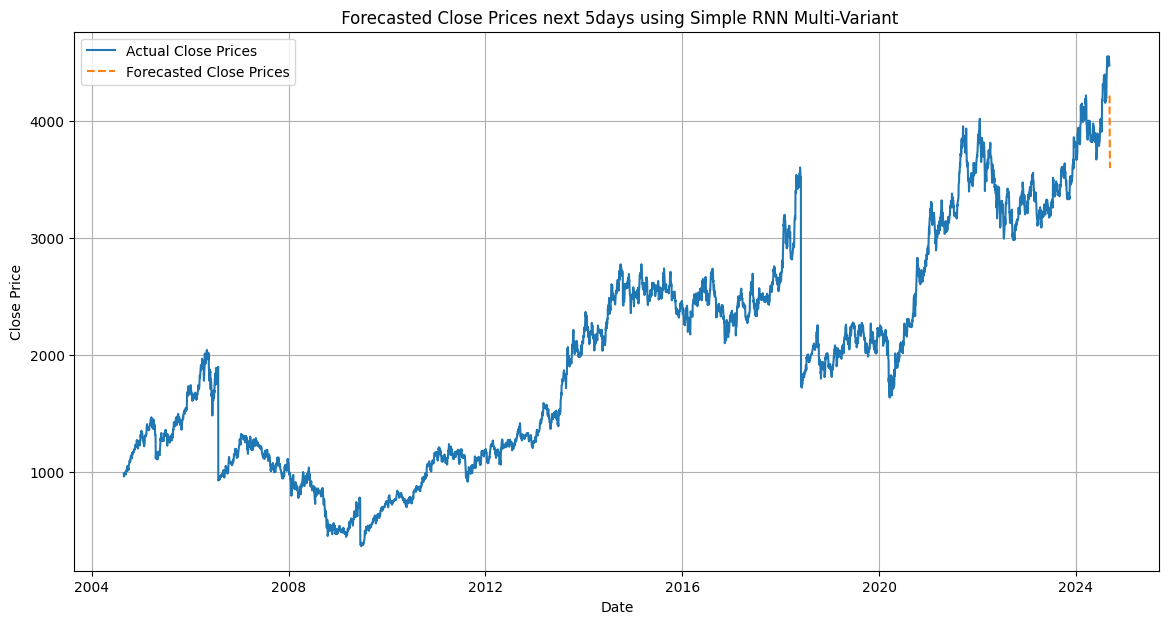

In [57]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the results
plt.figure(figsize=(14, 7))


# Convert 'Date' column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    # Use '%Y-%m-%d' format for four-digit year
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Convert dates to naive timestamps if they are timezone-aware
plt.plot(data['Date'].dt.tz_localize(None), data['Close'], label='Actual Close Prices')


# Plot forecasted closing prices
forecasted_dates = pd.to_datetime(next_5_dates)
# Convert dates to naive timestamps if they are timezone-aware
plt.plot(forecasted_dates.tz_localize(None), forecasted_prices, label='Forecasted Close Prices', linestyle='--')



plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(' Forecasted Close Prices next 5days using Simple RNN Multi-Variant')
#show grid in graph
plt.grid(True)
plt.legend()
plt.show()

In [56]:
# Print the next 5 days' closing prices with dates


for date, price in zip(next_5_dates, forecasted_prices):
    print(f" {date.strftime('%Y-%m-%d')} : {price[0]}")

 2024-09-06 : 4218.103515625
 2024-09-07 : 3910.607666015625
 2024-09-08 : 3724.722412109375
 2024-09-09 : 3620.058837890625
 2024-09-10 : 3597.92333984375


In [59]:
# Generate predictions for the entire dataset
predicted_prices = model.predict(X_seq)
predicted_prices = scaler_Y.inverse_transform(predicted_prices)

# Prepare data for plotting
actual_prices = scaler_Y.inverse_transform(Y_scaled[time_steps:])
dates = data['Date'][time_steps:]


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [61]:
# Import the necessary module for regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_test = actual_prices
y_pred = predicted_prices

# Calculate appropriate metrics for regression problems
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5493.717805795378
Root Mean Squared Error (RMSE): 74.11961822483558
Mean Absolute Error (MAE): 47.690606433222385
R-squared (R2): 0.9940743562578439


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# (3) LSTM

In [62]:
# Load
data = pd.read_csv('/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv')

# Replace commas in numerical columns with empty strings and convert to numeric
for col in ['Open', 'Low', 'High', 'Volume', 'Close']:  # Include 'Close' in the loop
    if data[col].dtype == object:
        data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

# Define X and Y
X = data[['Open', 'Low', 'High', 'Volume']].values  # Features
Y = data['Close'].values  # Target



# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

# SPLITTING
train_size = int(len(X_scaled) * 0.8)

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_test = Y_scaled[:train_size], Y_scaled[train_size:]



# Function to create sequences for time series prediction
def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])  # Create sequences of features
        Ys.append(Y[i + time_steps])      # Corresponding target (next step)
    return np.array(Xs), np.array(Ys)




# Set time_steps
time_steps = 60

# Create sequences for training and testing data
X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()  #summary

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Train the model

history = model.fit(X_seq, Y_seq, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - loss: 0.0090 - val_loss: 0.0017
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0013 - val_loss: 6.0100e-04
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0014 - val_loss: 9.2497e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 9.3007e-04 - val_loss: 0.0015
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 8.2926e-04 - val_loss: 7.8011e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 7.7044e-04 - val_loss: 4.5739e-04


Forecaste - step

In [68]:
# Forecasting the next 5 days
def forecast(model, X, n_steps):
    forecasted = []
    current_step = X[-1]

    for _ in range(n_steps):
        current_step = current_step.reshape(1, time_steps, X.shape[2])
        predicted = model.predict(current_step)
        forecasted.append(predicted[0, 0])
        current_step = np.roll(current_step, -1, axis=1)
        current_step[0, -1, 0] = predicted

    return scaler_Y.inverse_transform(np.array(forecasted).reshape(-1, 1))

# Forecast the next 5 days
forecasted_prices = forecast(model, X_seq, 5)

# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])

# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<ipython-input-68-3d5d34a7f840>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_step[0, -1, 0] = predicted


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [69]:
# Print the next 5 days' closing prices with dates


for date, price in zip(next_5_dates, forecasted_prices):
    print(f" {date.strftime('%Y-%m-%d')} : {price[0]}")

 2024-09-06 : 4391.755859375
 2024-09-07 : 4308.2119140625
 2024-09-08 : 4204.748046875
 2024-09-09 : 4100.92724609375
 2024-09-10 : 4008.55126953125


plot_only5days

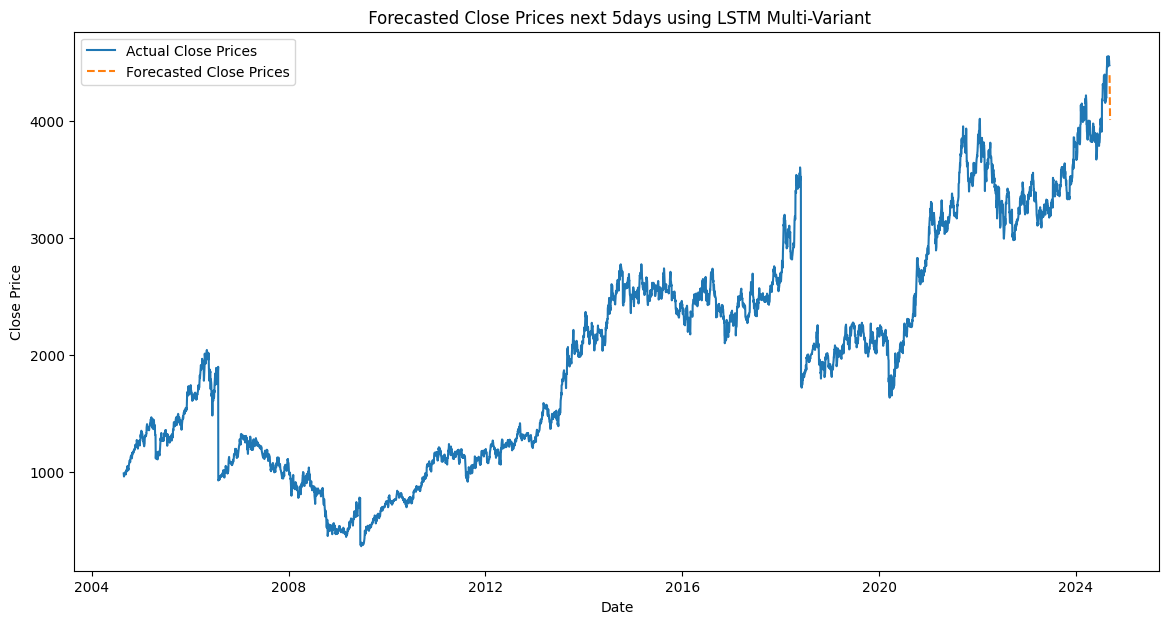

In [70]:
# Plotting the results
plt.figure(figsize=(14, 7))


# Convert 'Date' column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    # Use '%Y-%m-%d' format for four-digit year
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Convert dates to naive timestamps if they are timezone-aware
plt.plot(data['Date'].dt.tz_localize(None), data['Close'], label='Actual Close Prices')


# Plot forecasted closing prices
forecasted_dates = pd.to_datetime(next_5_dates)
# Convert dates to naive timestamps if they are timezone-aware
plt.plot(forecasted_dates.tz_localize(None), forecasted_prices, label='Forecasted Close Prices', linestyle='--')



plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(' Forecasted Close Prices next 5days using LSTM Multi-Variant')
plt.legend()
plt.show()

see_accuracy_RMSE

In [71]:
# Import the necessary module for regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_test = actual_prices
y_pred = predicted_prices

# Calculate appropriate metrics for regression problems
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5493.717805795378
Root Mean Squared Error (RMSE): 74.11961822483558
Mean Absolute Error (MAE): 47.690606433222385
R-squared (R2): 0.9940743562578439


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# (4) Bi-Directional LSTM

In [72]:
# Load
data = pd.read_csv('/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv')

# Replace commas in numerical columns with empty strings and convert to numeric
for col in ['Open', 'Low', 'High', 'Volume', 'Close']:  # Include 'Close' in the loop
    if data[col].dtype == object:
        data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

# Define X and Y
X = data[['Open', 'Low', 'High', 'Volume']].values  # Features
Y = data['Close'].values  # Target



# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

# SPLITTING
train_size = int(len(X_scaled) * 0.8)

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_test = Y_scaled[:train_size], Y_scaled[train_size:]



# Function to create sequences for time series prediction
def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])  # Create sequences of features
        Ys.append(Y[i + time_steps])      # Corresponding target (next step)
    return np.array(Xs), np.array(Ys)




# Set time_steps
time_steps = 60

# Create sequences for training and testing data
X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Bidirectional #for Bi-Directional nature making
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional


In [74]:
# Define the Bi-directional LSTM model
model = Sequential()

# First BiLSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dropout(0.2))

# Second BiLSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))

# Output layer (regression task)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 100)             │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,501 (322.27 KB)

 Trainable params: 82,501 (322.27 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Train the model

history = model.fit(X_seq, Y_seq, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - loss: 0.0097 - val_loss: 0.0028
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - loss: 0.0012 - val_loss: 6.3288e-04
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - loss: 9.7087e-04 - val_loss: 4.4444e-04
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 8.6856e-04 - val_loss: 4.3483e-04
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - loss: 8.8767e-04 - val_loss: 4.7325e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - loss: 9.3900e-04 - val_loss: 6.9831e-04
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - loss: 6.8495e-04 - val_loss: 4.2654e-04
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - loss: 8.2287e-04 - val_loss: 9.1665e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - loss: 7.4343e-04 - val_loss: 7.7572e-04


Forecaste

In [76]:
# Forecasting the next 5 days
def forecast(model, X, n_steps):
    forecasted = []
    current_step = X[-1]

    for _ in range(n_steps):
        current_step = current_step.reshape(1, time_steps, X.shape[2])
        predicted = model.predict(current_step)
        forecasted.append(predicted[0, 0])
        current_step = np.roll(current_step, -1, axis=1)
        current_step[0, -1, 0] = predicted

    return scaler_Y.inverse_transform(np.array(forecasted).reshape(-1, 1))

# Forecast the next 5 days
forecasted_prices = forecast(model, X_seq, 5)

# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])

# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


<ipython-input-76-3d5d34a7f840>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_step[0, -1, 0] = predicted


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Next_5days

In [77]:
# Print the next 5 days' closing prices with dates

for date, price in zip(next_5_dates, forecasted_prices):
    print(f" {date.strftime('%Y-%m-%d')} : {price[0]}")

 2024-09-06 : 4309.634765625
 2024-09-07 : 4182.72705078125
 2024-09-08 : 4064.85791015625
 2024-09-09 : 3962.58154296875
 2024-09-10 : 3880.047607421875


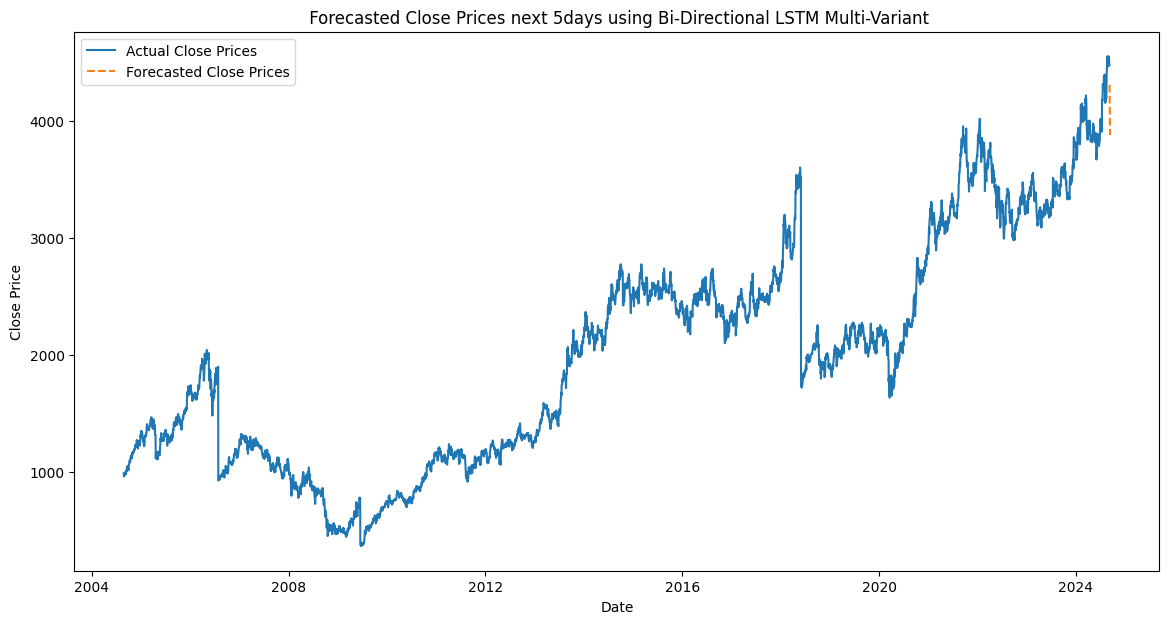

In [78]:
# Plotting
plt.figure(figsize=(14, 7))


# Convert 'Date' column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    # Use '%Y-%m-%d' format for four-digit year
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Convert dates to naive timestamps if they are timezone-aware
plt.plot(data['Date'].dt.tz_localize(None), data['Close'], label='Actual Close Prices')


# Plot forecasted closing prices
forecasted_dates = pd.to_datetime(next_5_dates)
# Convert dates to naive timestamps if they are timezone-aware
plt.plot(forecasted_dates.tz_localize(None), forecasted_prices, label='Forecasted Close Prices', linestyle='--')



plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(' Forecasted Close Prices next 5days using Bi-Directional LSTM Multi-Variant')
plt.legend()
plt.show()

see_accuracy_Matrix

In [79]:
# Import the necessary module for regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'actual_prices' and 'predicted_prices' from previous calculations are your true and predicted values
y_test = actual_prices
y_pred = predicted_prices

# Calculate appropriate metrics for regression problems
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5493.717805795378
Root Mean Squared Error (RMSE): 74.11961822483558
Mean Absolute Error (MAE): 47.690606433222385
R-squared (R2): 0.9940743562578439


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# (5) Stacked_Model

Stacked Model:- A model that is composed of multiple layers of the same type of neural network architecture stacked on top of each other. The idea behind a stacked model is to increase the model’s depth, allowing it to learn more complex patterns and hierarchical representations from the input data.

Stacked RNN

In [82]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Define the Stacked RNN model
model = Sequential()

# First RNN layer with 50 units, return_sequences=True to pass the sequence to the next layer
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dropout(0.2))  # Dropout for regularization

# Second RNN layer with 50 units, passing the sequence again
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))  # Dropout for regularization

# Third RNN layer with 50 units, return_sequences=False to get the final output
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout for regularization

# Output layer to predict a single continuous value
model.add(Dense(units=1))

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()  # Display model architecture


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,901 (50.39 KB)

 Trainable params: 12,901 (50.39 KB)

 Non-trainable params: 0 (0.00 B)

Stacked LSTM model

In [81]:

# Define the Stacked LSTM model
model = Sequential()

# ---- Input Layer + First Hidden Layer ----
# First LSTM layer - Input Layer and First Hidden Layer
# The input shape (X_seq.shape[1], X_seq.shape[2]) corresponds to the number of time steps and features
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))  # Input + Hidden
model.add(Dropout(0.2))  # Dropout for regularization

# ---- Second Hidden Layer ----
# Second LSTM layer - Second Hidden Layer
model.add(LSTM(units=50, return_sequences=True))  # Hidden
model.add(Dropout(0.2))  # Dropout for regularization

# ---- Third Hidden Layer ----
# Third LSTM layer - Third Hidden Layer
model.add(LSTM(units=50, return_sequences=False))  # Hidden
model.add(Dropout(0.2))  # Dropout for regularization

# ---- Output Layer ----
# The Dense layer is the Output Layer, producing a single continuous value for regression
model.add(Dense(units=1))  # Output

# Compile the model with Adam optimizer and MSE loss for regression tasks
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary to view the architecture
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 60, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,451 (200.98 KB)

 Trainable params: 51,451 (200.98 KB)

 Non-trainable params: 0 (0.00 B)